In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df = df[df.CustomerID.notnull() & (df.UnitPrice != 0)]

In [7]:
df.CustomerID = df.CustomerID.astype('int64')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

/home/denis/.local/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/tmp/ipykernel_33678/3075380895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)


In [8]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [9]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m') 

/tmp/ipykernel_33678/3490021018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')


In [10]:
cohorts = df.groupby('CustomerID', as_index=False)['InvoiceMonth'].min()
cohorts.rename(columns={'InvoiceMonth': 'Cohort'}, inplace=True)
cohorts.head()

,CustomerID,Cohort
0,12346,2011-01
1,12347,2010-12
2,12348,2010-12
3,12349,2011-11
4,12350,2011-02


In [11]:
df_merged = pd.merge(df, cohorts, how='left', on='CustomerID')
df_merged.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12,2010-12


In [12]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [13]:
cohorts_group = df_merged.groupby(['Cohort', 'InvoiceMonth']).agg({'CustomerID': pd.Series.nunique})
cohorts_group.rename(columns={'CustomerID': 'TotalUsers',
                              'InvoiceNo': 'TotalOrders'}, inplace=True)
cohorts_group

TotalUsers
Cohort  InvoiceMonth            
2010-12 2010-12              948
        2011-01              362
        2011-02              317
        2011-03              367
        2011-04              341
...                          ...
2011-10 2011-11               93
        2011-12               46
2011-11 2011-11              320
        2011-12               43
2011-12 2011-12               41

[91 rows x 1 columns]

In [14]:
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group

TotalUsers  CohortPeriod
Cohort  InvoiceMonth                          
2010-12 2010-12              948             0
        2011-01              362             1
        2011-02              317             2
        2011-03              367             3
        2011-04              341             4
...                          ...           ...
2011-10 2011-11               93             1
        2011-12               46             2
2011-11 2011-11              320             0
        2011-12               43             1
2011-12 2011-12               41             0

[91 rows x 2 columns]

In [15]:
cohorts_group.reset_index(inplace=True)
cohorts_group

,Cohort,InvoiceMonth,TotalUsers,CohortPeriod
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,320,0
89,2011-11,2011-12,43,1


In [16]:
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True)
cohorts_group

InvoiceMonth  TotalUsers
Cohort  CohortPeriod                         
2010-12 0                 2010-12         948
        1                 2011-01         362
        2                 2011-02         317
        3                 2011-03         367
        4                 2011-04         341
...                           ...         ...
2011-10 1                 2011-11          93
        2                 2011-12          46
2011-11 0                 2011-11         320
        1                 2011-12          43
2011-12 0                 2011-12          41

[91 rows x 2 columns]

In [17]:
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
cohort_group_size

Cohort
2010-12    948
2011-01    421
2011-02    380
2011-03    440
2011-04    299
2011-05    279
2011-06    235
2011-07    191
2011-08    167
2011-09    298
2011-10    352
2011-11    320
2011-12     41
Name: TotalUsers, dtype: int64

In [18]:
cohorts_group['TotalUsers']

Cohort   CohortPeriod
2010-12  0               948
         1               362
         2               317
         3               367
         4               341
                        ... 
2011-10  1                93
         2                46
2011-11  0               320
         1                43
2011-12  0                41
Name: TotalUsers, Length: 91, dtype: int64

In [19]:
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.T

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohorts: User Retention'}, xlabel='CohortPeriod', ylabel='Cohort'>

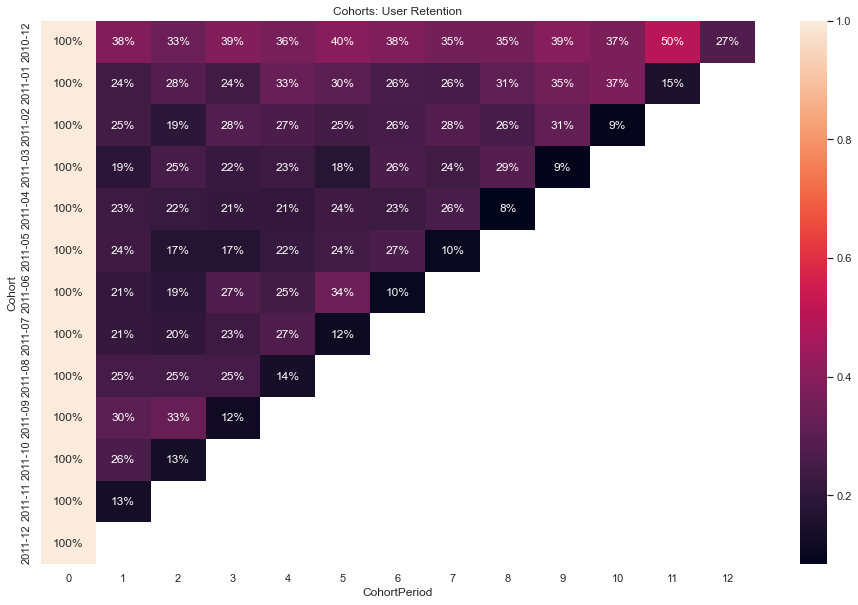

In [20]:
sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%')